<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/BC_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from google.colab import drive
from PIL import Image

# # 1. Mount data from Google Drive
# drive.mount('/content/drive')

# Define your data directory path
data_dir = '/content/drive/My Drive/data2'

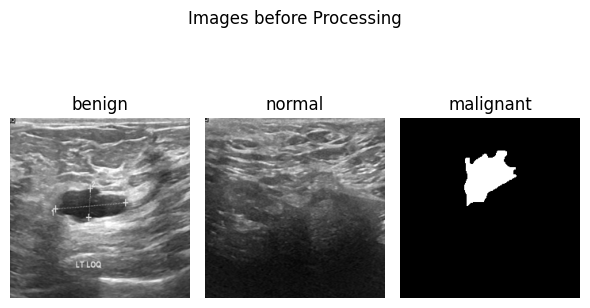

In [10]:
# Get the list of class names (subfolders)
classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]

# Plotting sample images from each class
plt.figure(figsize=(6, 6))
plt.suptitle('Images before Processing', fontsize=12)  # Add a title to the figure

for i, cls in enumerate(classes):
    cls_dir = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(cls_dir))
    img_path = os.path.join(cls_dir, img_file)
    img = load_img(img_path)
    plt.subplot(len(classes) // 3 + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(cls, fontsize=12)
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


In [11]:
# 3. Get the number of classes and the number of images in each class
num_classes = len(classes)
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
print("Number of classes:", num_classes)
print("Number of images in each class:", class_counts)

Number of classes: 3
Number of images in each class: {'benign': 891, 'normal': 266, 'malignant': 421}


In [ ]:
# # 4. Resize the image sizes to 227x227x3
# def resize_images(directory, size=(227, 227)):
#     for cls in classes:
#         cls_dir = os.path.join(directory, cls)
#         for img_file in os.listdir(cls_dir):
#             img_path = os.path.join(cls_dir, img_file)
#             try:
#                 img = Image.open(img_path)
#                 img = img.resize(size)
#                 img.save(img_path)  # overwrite original image with resized image
#             except (IOError, UnidentifiedImageError):
#                 print(f"Could not process file {img_path}")

# resize_images(data_dir)

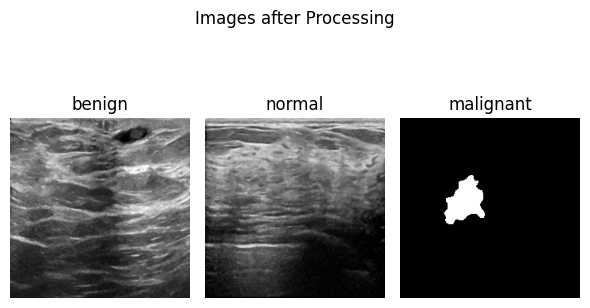

In [16]:
# Get the list of class names (subfolders)
classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]

# Plotting sample images from each class
plt.figure(figsize=(6, 6))
plt.suptitle('Images after Processing', fontsize=12)  # Add a title to the figure

for i, cls in enumerate(classes):
    cls_dir = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(cls_dir))
    img_path = os.path.join(cls_dir, img_file)
    img = load_img(img_path)
    plt.subplot(len(classes) // 3 + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(cls, fontsize=12)
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


In [17]:
# 6. Split the data into training and testing with a ratio of 80 and 20
X, y = [], []
label_map = {cls: idx for idx, cls in enumerate(classes)}

for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_dir):
        img_path = os.path.join(cls_dir, img_file)
        img = load_img(img_path)
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label_map[cls])

X = np.array(X).astype('float32') / 255.0
y = np.array(y).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [25]:
# Define custom metrics for precision, recall, and F1-score
def precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))


In [40]:
# 7. Build a CNN structure with five layers
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
pip install tensorflow-addons

In [28]:
# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', precision, recall, f1_score])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
45/45 [==============================] - 85s 2s/step - loss: 0.8901 - accuracy: 0.5570 - precision: 5333333.5000 - recall: 1.2199 - f1_score: 1.0611 - val_loss: 0.7745 - val_accuracy: 0.5506 - val_precision: 0.7939 - val_recall: 1.1715 - val_f1_score: 0.9281
Epoch 2/10
45/45 [==============================] - 77s 2s/step - loss: 0.6580 - accuracy: 0.7063 - precision: 0.7022 - recall: 1.3366 - f1_score: 0.9074 - val_loss: 0.7179 - val_accuracy: 0.6582 - val_precision: 0.8074 - val_recall: 1.3108 - val_f1_score: 0.9830
Epoch 3/10
45/45 [==============================] - 93s 2s/step - loss: 0.5355 - accuracy: 0.7690 - precision: 0.7049 - recall: 1.2984 - f1_score: 0.8993 - val_loss: 0.7002 - val_accuracy: 0.7215 - val_precision: 0.7712 - val_recall: 1.3656 - val_f1_score: 0.9713
Epoch 4/10
45/45 [==============================] - 70s 2s/step - loss: 0.4087 - accuracy: 0.8352 - precision: 0.5971 - recall: 1.1965 - f1_score: 0.7888 - val_loss: 0.9481 - val_accuracy: 0.6962 - val_

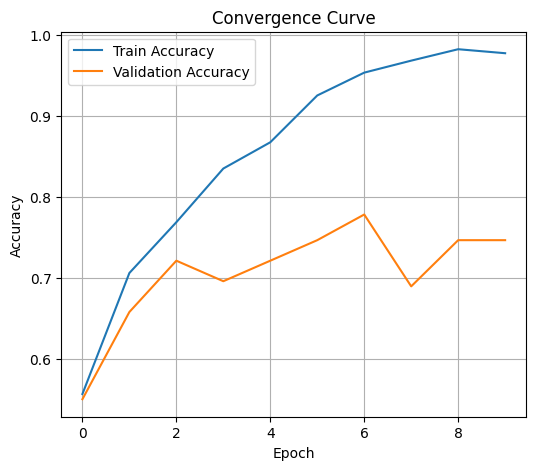

In [29]:
# 10. Draw the convergence curve
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Convergence Curve')
plt.grid()
plt.show()


In [30]:
# Compute confusion matrix for training and validation sets
train_predictions = np.argmax(model.predict(X_train), axis=1)
test_predictions = np.argmax(model.predict(X_test), axis=1)

cm_train = confusion_matrix(y_train, train_predictions)
cm_test = confusion_matrix(y_test, test_predictions)

5/5 [==============================] - 2s 377ms/step


In [ ]:
# 12. Compute precision, recall, and F1 scores for training sets and testing cases. Put it in a table.
print("Training Classification Report")
print(classification_report(y_train, train_predictions, target_names=classes))

print("Testing Classification Report")
print(classification_report(y_test, test_predictions, target_names=classes))

In [32]:
# Plot confusion matrices
def plot_confusion_matrices(cm_train, cm_test, classes, train_title, test_title, filename):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Training confusion matrix
    ax[0].imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    ax[0].set_title(train_title, fontsize=14)
    tick_marks = np.arange(len(classes))
    ax[0].set_xticks(tick_marks)
    ax[0].set_yticks(tick_marks)
    ax[0].set_xticklabels(classes, rotation=45, fontsize=10)
    ax[0].set_yticklabels(classes, fontsize=10)
    fmt = 'd'
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        ax[0].text(j, i, format(cm_train[i, j], fmt),
                   horizontalalignment="center",
                   color="white" if cm_train[i, j] > thresh else "black",
                   fontsize=10)
    ax[0].set_ylabel(r'\textbf{True label}', fontsize=12)
    ax[0].set_xlabel(r'\textbf{Predicted label}', fontsize=12)
    ax[0].grid(False)

    # Testing confusion matrix
    ax[1].imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    ax[1].set_title(test_title, fontsize=14)
    ax[1].set_xticks(tick_marks)
    ax[1].set_yticks(tick_marks)
    ax[1].set_xticklabels(classes, rotation=45, fontsize=10)
    ax[1].set_yticklabels(classes, fontsize=10)
    fmt = 'd'
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        ax[1].text(j, i, format(cm_test[i, j], fmt),
                   horizontalalignment="center",
                   color="white" if cm_test[i, j] > thresh else "black",
                   fontsize=10)
    ax[1].set_ylabel(r'\textbf{True label}', fontsize=12)
    ax[1].set_xlabel(r'\textbf{Predicted label}', fontsize=12)
    ax[1].grid(False)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


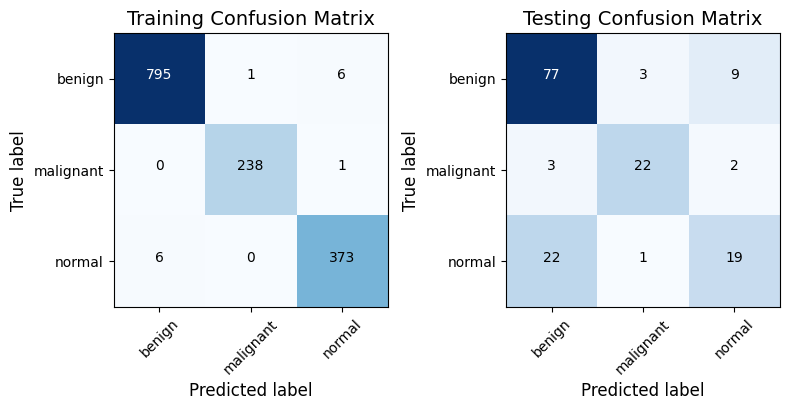

Training Classification Report
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99       802
   malignant       1.00      1.00      1.00       239
      normal       0.98      0.98      0.98       379

    accuracy                           0.99      1420
   macro avg       0.99      0.99      0.99      1420
weighted avg       0.99      0.99      0.99      1420

Testing Classification Report
              precision    recall  f1-score   support

      benign       0.75      0.87      0.81        89
   malignant       0.85      0.81      0.83        27
      normal       0.63      0.45      0.53        42

    accuracy                           0.75       158
   macro avg       0.74      0.71      0.72       158
weighted avg       0.74      0.75      0.74       158

Training Report Table
              precision    recall  f1-score      support
benign         0.992509  0.991272  0.991890   802.000000
malignant      0.995816  0.995816  0.9958

In [38]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrices(cm_train, cm_test, classes, train_title, test_title, filename):
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))

    # Training confusion matrix
    ax[0].imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    ax[0].set_title(train_title, fontsize=14)
    tick_marks = np.arange(len(classes))
    ax[0].set_xticks(tick_marks)
    ax[0].set_yticks(tick_marks)
    ax[0].set_xticklabels(classes, rotation=45, fontsize=10)
    ax[0].set_yticklabels(classes, fontsize=10)
    fmt = 'd'
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        ax[0].text(j, i, format(cm_train[i, j], fmt),
                   horizontalalignment="center",
                   color="white" if cm_train[i, j] > thresh else "black",
                   fontsize=10)
    ax[0].set_ylabel('True label', fontsize=12)
    ax[0].set_xlabel('Predicted label', fontsize=12)
    ax[0].grid(False)

    # Testing confusion matrix
    ax[1].imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    ax[1].set_title(test_title, fontsize=14)
    ax[1].set_xticks(tick_marks)
    ax[1].set_yticks(tick_marks)
    ax[1].set_xticklabels(classes, rotation=45, fontsize=10)
    ax[1].set_yticklabels(classes, fontsize=10)
    fmt = 'd'
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        ax[1].text(j, i, format(cm_test[i, j], fmt),
                   horizontalalignment="center",
                   color="white" if cm_test[i, j] > thresh else "black",
                   fontsize=10)
    ax[1].set_ylabel('True label', fontsize=12)
    ax[1].set_xlabel('Predicted label', fontsize=12)
    ax[1].grid(False)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

plot_confusion_matrices(cm_train, cm_test, ['benign', 'malignant', 'normal'], 'Training Confusion Matrix', 'Testing Confusion Matrix', 'confusion_matrices.png')

# Compute precision, recall, and F1 scores for training sets and testing cases
print("Training Classification Report")
train_report = classification_report(y_train, train_predictions, target_names=['benign', 'malignant', 'normal'], output_dict=True)
print(classification_report(y_train, train_predictions, target_names=['benign', 'malignant', 'normal']))

print("Testing Classification Report")
test_report = classification_report(y_test, test_predictions, target_names=['benign', 'malignant', 'normal'], output_dict=True)
print(classification_report(y_test, test_predictions, target_names=['benign', 'malignant', 'normal']))

# Convert reports to tables
train_report_df = pd.DataFrame(train_report).transpose()
test_report_df = pd.DataFrame(test_report).transpose()

print("Training Report Table")
print(train_report_df)

print("Testing Report Table")
print(test_report_df)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 225, 225, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 55, 55, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 64)       

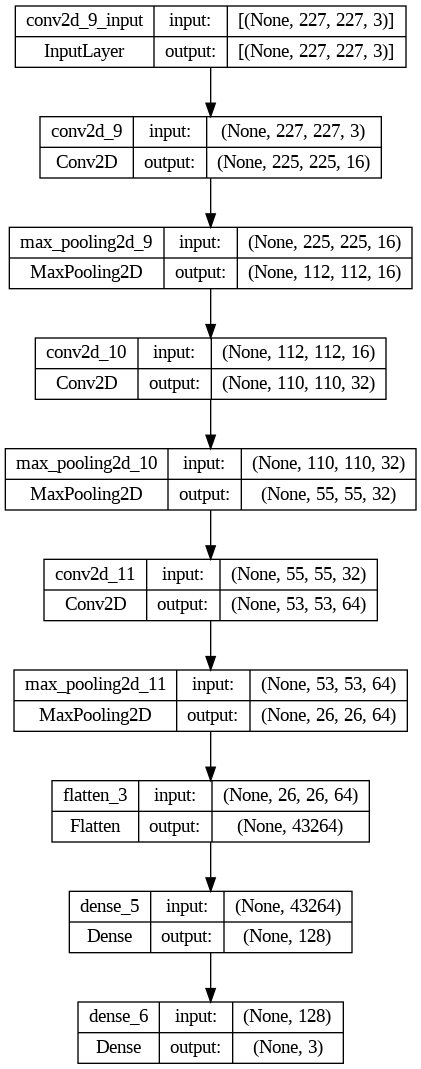

In [41]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming you have already built and compiled your model
model.summary()

# Save the network structure as a PNG file
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Display the saved model structure
from IPython.display import Image
Image('model_structure.png')
